In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import files
#Loading the dataset
uploaded = files.upload()

Saving Energy_consumption.csv to Energy_consumption (2).csv


# **DATA UNDERSTANDING**

In [ ]:
#Reading the dataset
df = pd.read_csv("Energy_consumption.csv")
df.head()


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
None


In [ ]:
print(df.describe())

       Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015975    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120  


In [ ]:
print(df.isnull().sum())

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


In [ ]:
df.dtypes

,0
Timestamp,object
Temperature,float64
Humidity,float64
SquareFootage,float64
Occupancy,int64
HVACUsage,object
LightingUsage,object
RenewableEnergy,float64
DayOfWeek,object
Holiday,object


In [ ]:
#Finding if there are any negative values in energy consumption and occupancy columns
print("Negative Energy values:", (df["EnergyConsumption"] < 0).sum())
print("Negative Occupancy:", (df["Occupancy"] < 0).sum())

Negative Energy values: 0
Negative Occupancy: 0


In [ ]:
# Converting Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


# Exploratory Data Analysis

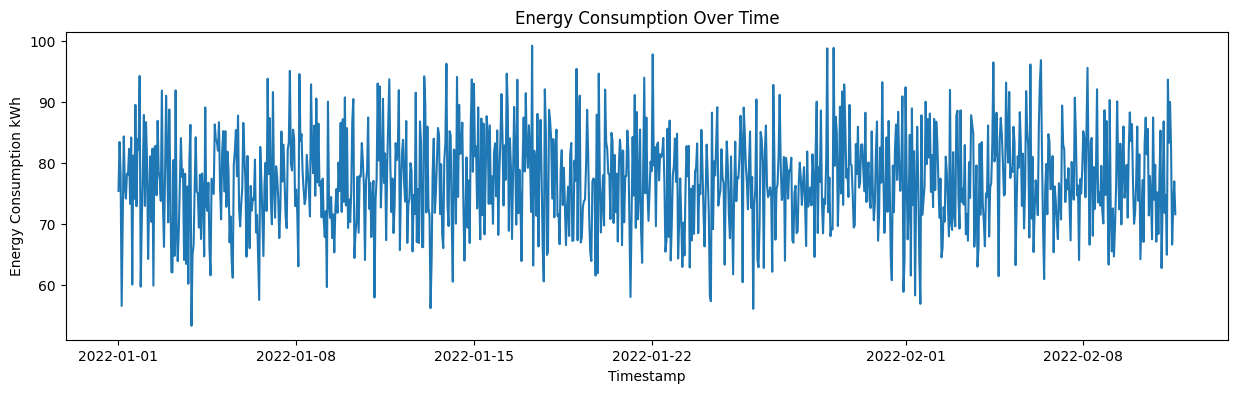

mean :77.05587286869279


In [ ]:
#plot of energy consumption vs time
plt.figure(figsize=(15,4))
plt.plot(df["Timestamp"], df["EnergyConsumption"])
plt.title("Energy Consumption Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Energy Consumption kWh")
plt.show()
mean_energy = df['EnergyConsumption'].mean()
print(f"mean :{mean_energy}")

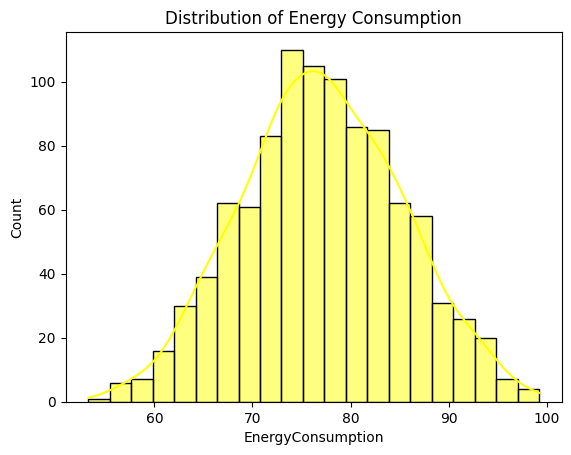

In [ ]:
sns.histplot(df["EnergyConsumption"], kde=True, color='yellow')
plt.title("Distribution of Energy Consumption")
plt.show()

Average energy consumption is 77.06 units.

Most values lie within ±1 standard deviation (8.14).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


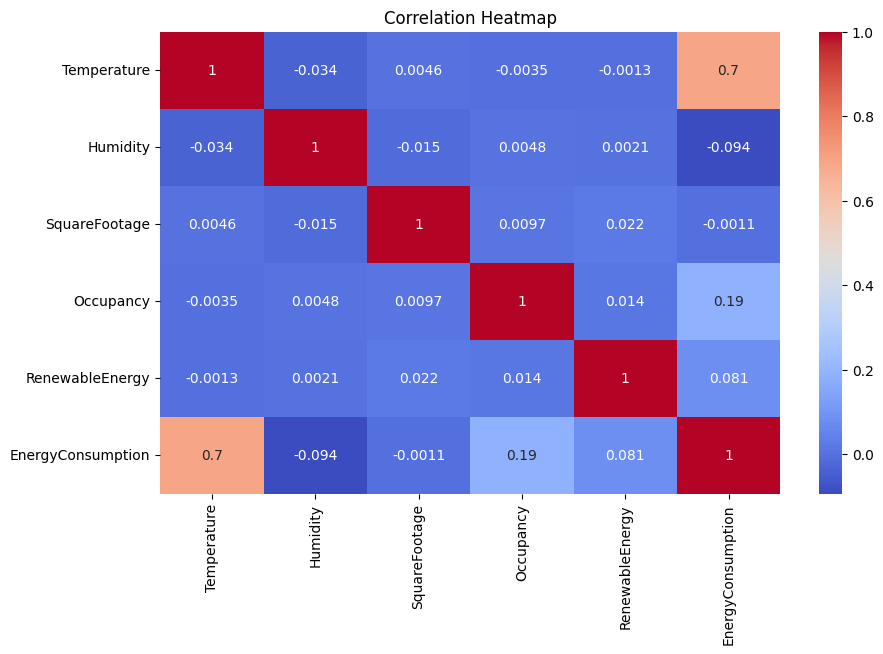

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Correlation w.r.to Energy consumed :
- Temperature: correlation strength = 0.70
- Occupancy: correlation strength = 0.19
- Humidity: correlation strength = 0.09
- RenewableEnergy: correlation strength = 0.08

Temperature is the highest correlated

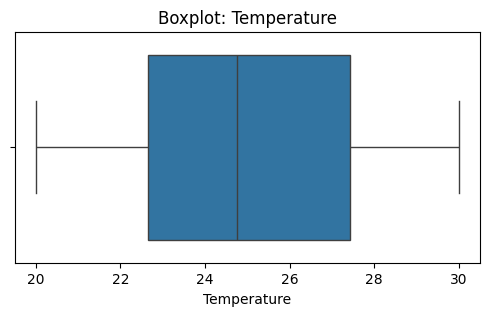

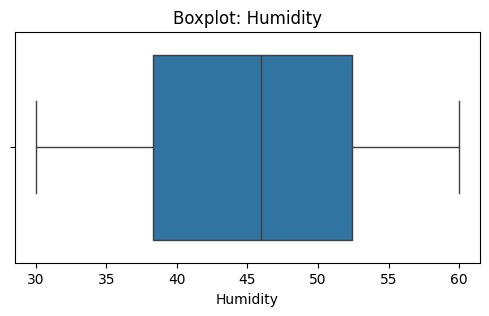

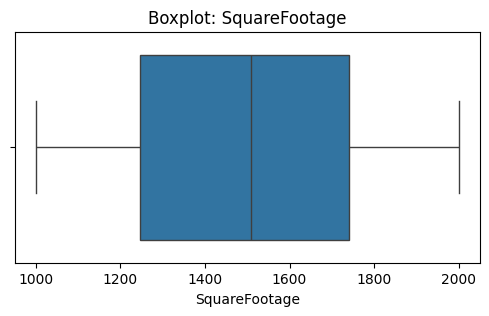

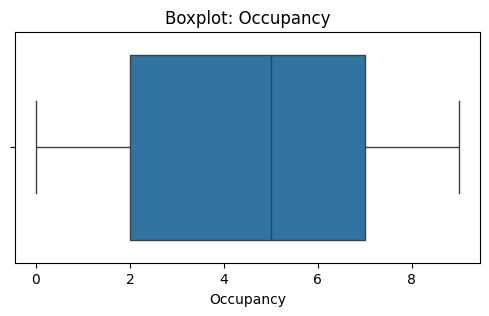

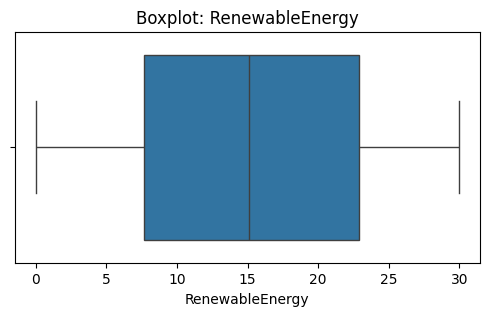

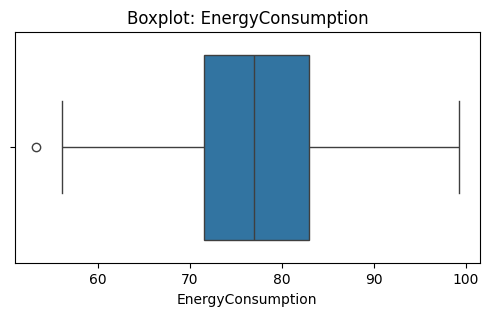

In [ ]:
for col in numeric_df:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


From the above box-plots we observe that
There exist one outlier in Energy Consumption column

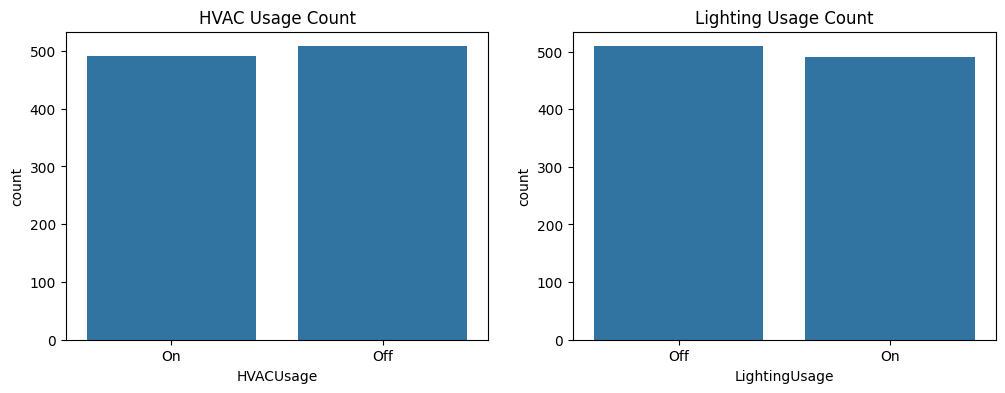

In [ ]:
#HVAC & Lighting Usage Patterns
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x=df["HVACUsage"], ax=ax[0])
ax[0].set_title("HVAC Usage Count")

sns.countplot(x=df["LightingUsage"], ax=ax[1])
ax[1].set_title("Lighting Usage Count")

plt.show()


Count of HVAC Usage when "Off" is Higher than "On",
Lighting Usage follows the same

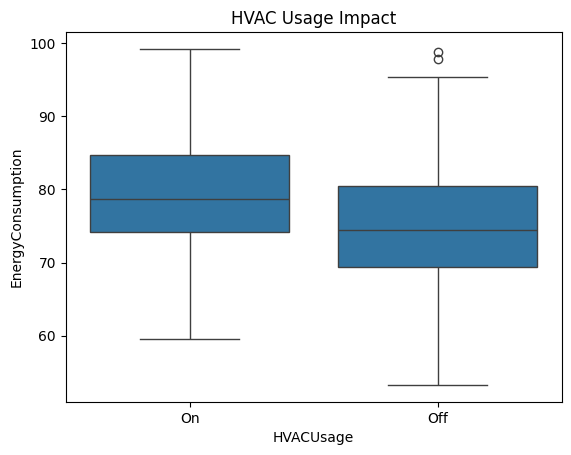

Avg Energy consumed when HVAC ON : 79.43
Avg Energy consumed when HVAC ON : 74.76


In [ ]:
#HVAC Usage Vs Energy Consumption
plt.figure()
sns.boxplot(x="HVACUsage", y="EnergyConsumption", data=df)
plt.title("HVAC Usage Impact")
plt.show()

hvac_means = df.groupby("HVACUsage")["EnergyConsumption"].mean()
print(f"Avg Energy consumed when HVAC ON : {hvac_means['On']:.2f}")
print(f"Avg Energy consumed when HVAC ON : {hvac_means['Off']:.2f}")

Energy consumption Increases when HVAC usage increases

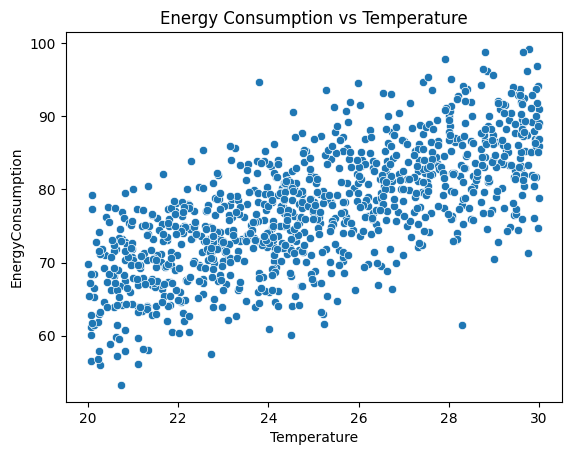

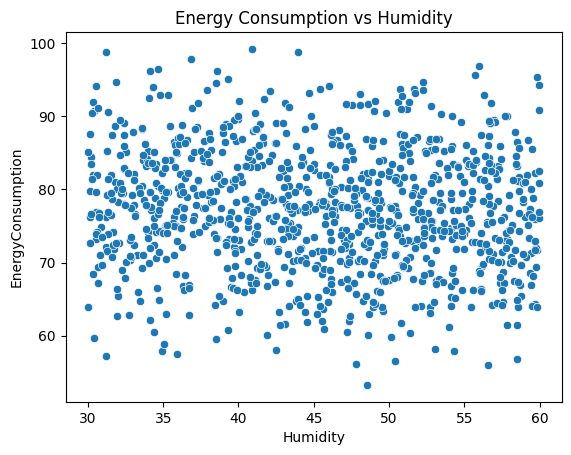

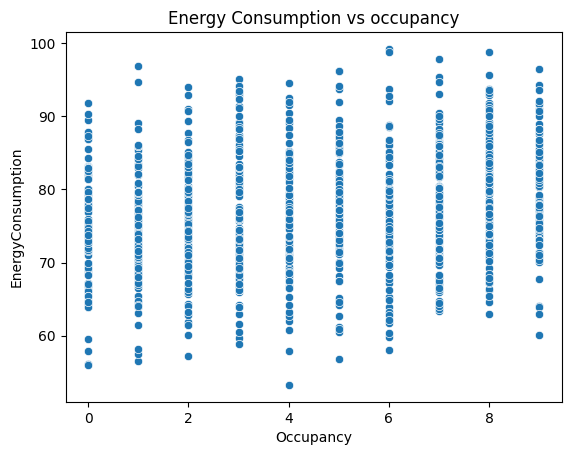

In [ ]:
#Energy vs Temperature / Humidity
sns.scatterplot(x=df["Temperature"], y=df["EnergyConsumption"])
plt.title("Energy Consumption vs Temperature")
plt.show()

sns.scatterplot(x=df["Humidity"], y=df["EnergyConsumption"])
plt.title("Energy Consumption vs Humidity")
plt.show()

sns.scatterplot(x=df["Occupancy"], y=df["EnergyConsumption"])
plt.title("Energy Consumption vs occupancy")
plt.show()


Strong correlation between energy consumption and temperature

Temperature Increases energy consumption increases

Humidity is a poor predictor, it does not directly affect the energy consumption


Energy Consumption is highest when occupancy is higher (i.e when occupancy is 8)

Other factors (temperature, HVAC usage, occupancy) dominate energy usage rather than humidity.

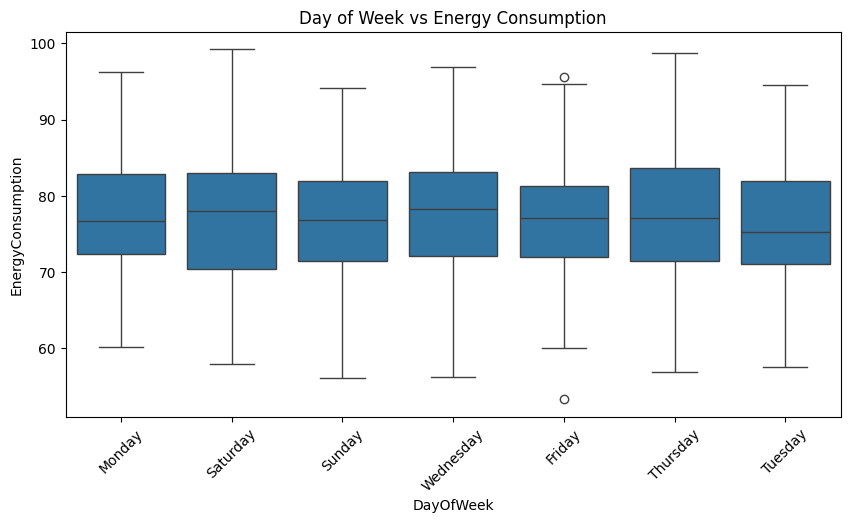

Highest avg Energy consumption occurs on: Monday
Lowest avg Energy consumption occurs on: Tuesday


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="DayOfWeek", y="EnergyConsumption", data=df)
plt.xticks(rotation=45)
plt.title("Day of Week vs Energy Consumption")
plt.show()

day_means = df.groupby("DayOfWeek")["EnergyConsumption"].mean()
maxd = day_means.idxmax()
mind = day_means.idxmin()

print(f"Highest avg Energy consumption occurs on: {maxd}")
print(f"Lowest avg Energy consumption occurs on: {mind}")

In [ ]:
#Creating time features

df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month
df["Weekday"] = df["Timestamp"].dt.weekday

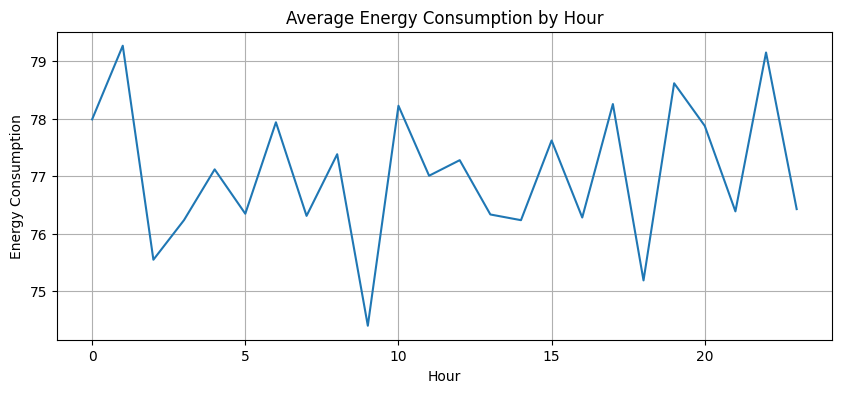

In [ ]:
#Hourly Energy Usage Trend
hourly = df.groupby("Hour")["EnergyConsumption"].mean()

plt.figure(figsize=(10,4))
plt.plot(hourly.index, hourly.values)
plt.title("Average Energy Consumption by Hour")
plt.xlabel("Hour")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()


Energy Consumption is high at hours 1-2 and at hours 22-23

#Summary


EDA - Summary

1. Total records: 1000
2. Total columns / features: 11
3. Time span: 2022-01-01 00:00:00 to 2022-02-11 15:00:00

Correlation w.r.to Energy consumed :

1. Temperature: correlation strength = 0.70
2. Occupancy: correlation strength = 0.19
3. Humidity: correlation strength = 0.09
4. RenewableEnergy: correlation strength = 0.08

Maximum avg energy consumed on Monday

Minimum avg energy consumed on tuesday